In [244]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Create the DataFrame
bruteforce_dataframe = pd.read_csv("bruteforce_training_data.csv")
bruteforce_dataframe.head()

,rcvdPkt,label
0,23,0
1,8,0
2,28,1
3,25,1
4,6,0


In [245]:
#filter duplicate data
bruteforce_dataframe = bruteforce_dataframe.drop_duplicates(subset="rcvdPkt", keep="first")

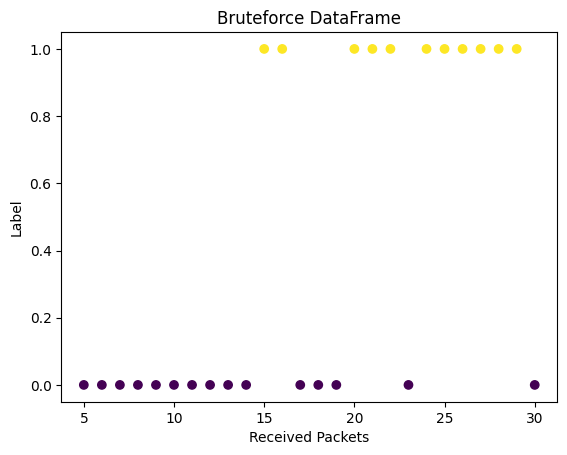

In [246]:
# Plot the data
plt.scatter(bruteforce_dataframe['rcvdPkt'], bruteforce_dataframe['label'], c=bruteforce_dataframe['label'], cmap='viridis')
plt.xlabel('Received Packets')
plt.ylabel('Label')
plt.title('Bruteforce DataFrame')
plt.show()

In [247]:
# Prepare data for kNN
X = bruteforce_dataframe[['rcvdPkt']]
y = bruteforce_dataframe['label']

# Create a kNN classifier
brute_force_knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Fit the model
brute_force_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

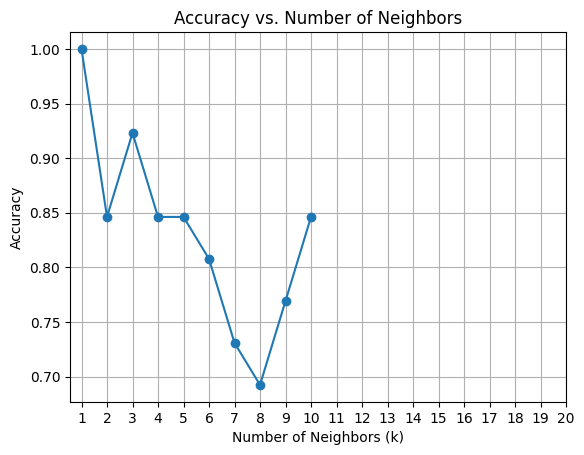

In [248]:
## Optimal Value of K

k_values = []
accuracies = []

# Test different values of k
for k in range(1, 11):  # Test k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    knn_predictions = knn.predict(X)
    accuracy = accuracy_score(y, knn_predictions)
    
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the accuracy chart
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(1, 21))  # Set x-axis ticks from 1 to 20
plt.grid(True)
plt.show()

In [249]:
# Predict using the model (example: predict for rcvdPkt=16)
new_data = pd.DataFrame({'rcvdPkt': [180]})
predicted_label = knn.predict(new_data)

print("Predicted Label:", predicted_label)

Predicted Label: [1]


In [250]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Create the dos_dataframe
dos_dataframe = pd.read_csv("dos_training_data.csv")

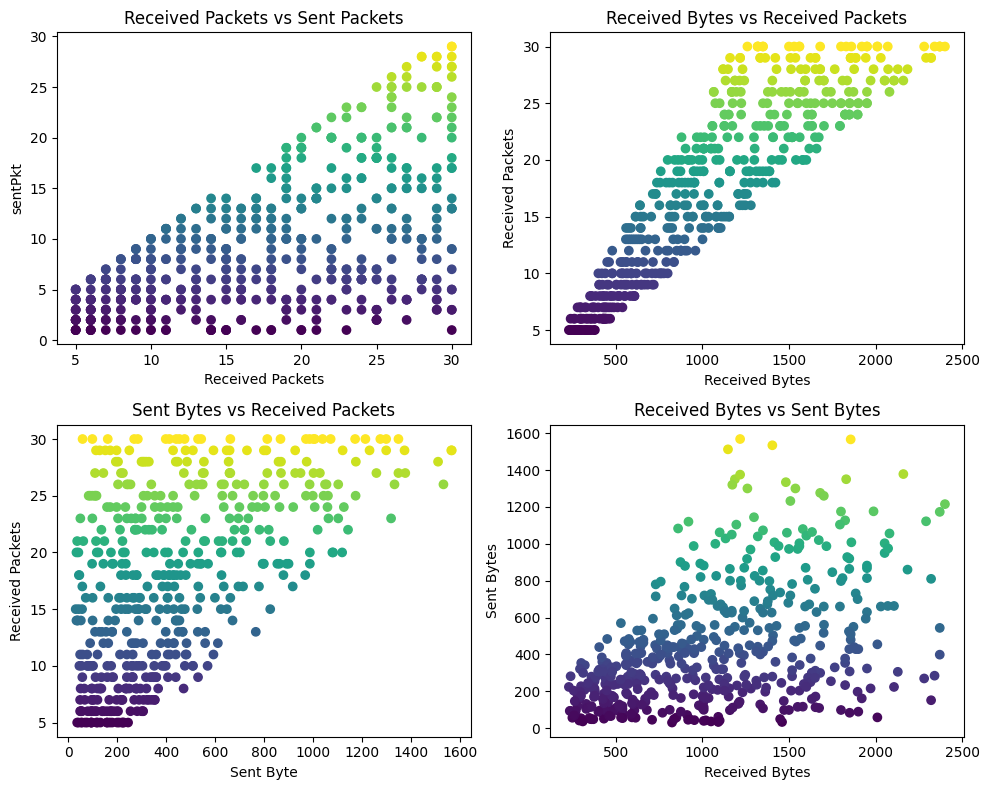

In [251]:
# Plot the data
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(dos_dataframe['rcvdPkt'], dos_dataframe['sentPkt'], c=dos_dataframe['sentPkt'], cmap='viridis')
axs[0, 0].set_xlabel('Received Packets')
axs[0, 0].set_ylabel('sentPkt')
axs[0, 0].set_title('Received Packets vs Sent Packets')

axs[0, 1].scatter(dos_dataframe['rcvdByte'], dos_dataframe['rcvdPkt'], c=dos_dataframe['rcvdPkt'], cmap='viridis')
axs[0, 1].set_xlabel('Received Bytes')
axs[0, 1].set_ylabel('Received Packets')
axs[0, 1].set_title('Received Bytes vs Received Packets')

axs[1, 0].scatter(dos_dataframe['sentByte'], dos_dataframe['rcvdPkt'], c=dos_dataframe['rcvdPkt'], cmap='viridis')
axs[1, 0].set_xlabel('Sent Byte')
axs[1, 0].set_ylabel('Received Packets')
axs[1, 0].set_title('Sent Bytes vs Received Packets')

axs[1, 1].scatter(dos_dataframe['rcvdByte'], dos_dataframe['sentByte'], c=dos_dataframe['sentByte'], cmap='viridis')
axs[1, 1].set_xlabel('Received Bytes')
axs[1, 1].set_ylabel('Sent Bytes')
axs[1, 1].set_title('Received Bytes vs Sent Bytes')

plt.tight_layout()
plt.show()

In [252]:
# Prepare data for kNN
X = dos_dataframe[['rcvdPkt', 'rcvdByte', 'sentPkt', 'sentByte']]
y = dos_dataframe['label']

# Create a kNN classifier
dos_knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Fit the model
dos_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

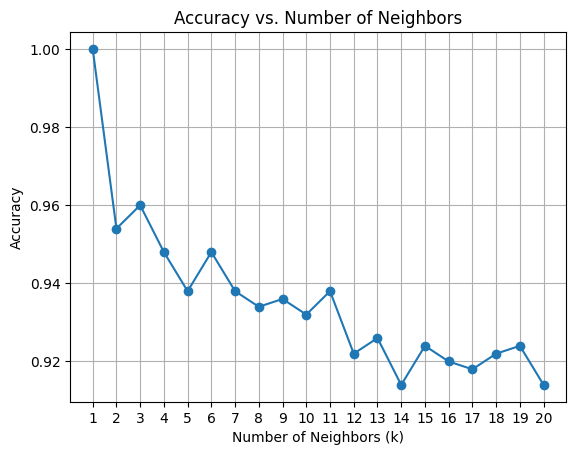

In [253]:
# Optimal value for k

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Initialize lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Assuming the kNN classifier and data preparation code is already present

# Test different values of k
for k in range(1, 21):  # Test k values from 1 to 20
    # Create a kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X, y)
    
    # Make predictions using the model
    knn_predictions = knn.predict(X)
    
    # Calculate accuracy
    accuracy = accuracy_score(y, knn_predictions)
    
    # Store k value and accuracy in lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the accuracy chart
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(1, 21))  # Set x-axis ticks from 1 to 20
plt.grid(True)
plt.show()

In [1]:
import mercury as mr
my_file = mr.File(label="File upload", max_file_size="100MB")    

mercury.File

In [256]:
real_data = pd.read_csv(my_file.filepath)
real_data.head()

,rcvdPkt,rcvdByte,sentPkt,sentByte
0,15,850,9,420
1,23,1367,12,596
2,5,245,3,115
3,12,714,6,282
4,8,463,4,192


In [257]:
dos_features = real_data[['rcvdPkt', 'rcvdByte', 'sentPkt', 'sentByte']]
predicted_values = dos_knn.predict(dos_features)

In [258]:
for index, each_value in enumerate(predicted_values):
    if each_value == 1:
        print("potential DOS")
        print(f"{'*'*10} \n {dos_features.iloc[index]} \n{'*'*10}")

potential DOS
********** 
 rcvdPkt       14
rcvdByte    1820
sentPkt       10
sentByte    1460
Name: 15, dtype: int64 
**********
